# 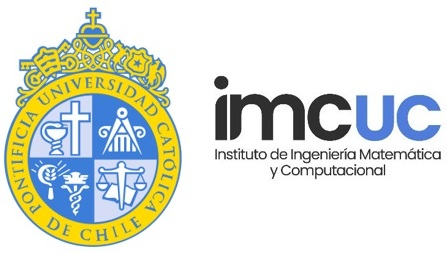  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 03: EDA - Exploración de Datos</center></h1>

## Instrucciones

- Fecha de publicación: martes 17 de octubre de 2023.

- Fecha de límite de entrega: martes 31 de octubre de 2023, a las 23:59.

- Vía de entrega: Módulo de Tareas en Canvas.

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.

- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.

- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.

- Las consultas y comentarios sobre la Tarea se deben hacer a traves del canal `Tarea 3` en el Foro del curso en Canvas.


## 1. Objetivos de la Tarea

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la exploración de datos. 

En los ejercicios a desarrollar a continuación, usted deberá extraer y explorar datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Esta tarea tiene como objetivo crear y realizar un análisis descriptivo de una base de datos para el estudio de factores determinantes en el rendimiento escolar de los estudiantes de educación básica y media en Chile. En particular, se busca analizar la relación entre el rendimiento escolar, representado por el promedio general de notas de cada estudiante, y factores determinantes como el porcentaje de asistencia a clases, y la razón entre docentes y estudiantes de los establecimientos educacionales.

In [32]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import seaborn as sns

## 2. Datos

Para este estudio, se utilizarán datos generados y publicados por el  Centro de Estudios del Ministerio de Educación de Chile: https://centroestudios.mineduc.cl/ <br>

El Centro de Estudios pone a disposición del público en general la plataforma Datos Abiertos para compartir información estadística en materia de educación, que incluye bases de datos de establecimientos educacionales, estudiantes y párvulos, docentes y asistentes de la educación, y sostenedores. Además, se entrega información georreferenciada.

Para el análisis planteado, se considerarán las siguientes fuentes de datos:

* **[BD1] Rendimiento académico por estudiante:** colección que agrupa datos para descagar información resumida del rendimiento desde el año 2002 al 2022.
https://datosabiertos.mineduc.cl/rendimiento-por-estudiante-2/

* **[BD2] Dotación docente por establecimiento:** datos de la dotación de docentes por colegio desde 2003 hasta este año 2023.
https://datosabiertos.mineduc.cl/resumen-de-docentes-por-establecimiento/

* **[BD3] Resumen de matrícula por establecimiento:** datos de cantidad de alumnos desde 2004 hasta 2022.
https://datosabiertos.mineduc.cl/resumen-de-matricula-por-establecimiento-educacional/

* **[BD4] Directorio de Establecimientos Educacionales:** Listado de establecimientos educacionales disponibles para cada año, desde 1992 a 2022. https://datosabiertos.mineduc.cl/directorio-de-establecimientos-educacionales/

* **[BD5]** Cartografía de comunas de Chile: capa vectorial disponible en la IDE Chile del Ministerio de Bienes Nacionales, https://www.ide.cl/.

## 3. Limpieza e Integración de Datos

Nuestro primer objetivo será generar un conjunto de datos limpio y consistente en una única tabla con valores promedio de NOTAS, ASISTENCIA, y RAZÓN DOCENTES/ESTUDIANTES para cada COMUNA del país. Para construir esta tabla, haga los pasos a continuación.

### 3.1 Acceso y revisión de bases (5 puntos)

Para cada conjuntos de datos, descargue los archivos correspondientes al año 2022 y léalos armando un dataframe para cada uno. Consulte la documentación asociada para identificar el contenido de cada uno.

Cada una de las bases de datos requiere un procesamiento previo al análisis. Aplique las operaciones necesarias para generar los conjuntos de datos limpios descritos en los siguientes puntos.

In [6]:
# datos de rendimiento escolar
edu0 = pd.read_csv('data/20230209_Rendimiento_2022_20230131_WEB.csv',delimiter=';')
edu = edu0.drop(columns=[ 'RBD', 'DGV_RBD', 'NOM_RBD','COD_PRO_RBD',  'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD','COD_DEPE', 'COD_DEPE2','COD_ENSE', 'COD_GRADO', 'LET_CUR', 'COD_JOR',
       'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU','COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA',
       'COD_SEC', 'COD_ESPE','COD_MEN', 'SIT_FIN','NOM_REG_RBD_A','ESTADO_ESTAB','RURAL_RBD','AGNO',])

C:\Users\rodri\AppData\Local\Temp\ipykernel_29548\884457638.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  edu0 = pd.read_csv('data/20230209_Rendimiento_2022_20230131_WEB.csv',delimiter=';')


In [7]:
edu = edu[edu['SIT_FIN_R'].isin(['P','R'])]

In [8]:
#edu.drop(columns=['AGNO'],inplace=True)
edu = edu.rename(columns={'COD_REG_RBD':'REGION','SIT_FIN_R':'SIT_FINAL','COD_COM_RBD':'COMUNA'})

In [9]:
edu = edu[edu['COD_ENSE2'].isin([2,5,7])]
edu = edu.rename(columns={'COD_ENSE2':'NIVEL'})

In [10]:
edu['NIVEL'] = edu['NIVEL'].map({5: 'media_ch', 7: 'media_tp',2:'basica'})

In [11]:
edu['PROM_GRAL'] = edu['PROM_GRAL'].str.replace(',','.')
edu['PROM_GRAL'] = edu['PROM_GRAL'].astype('float')

### 3.2 Primera base (10 puntos)

A partir de los datos descargados, genere una base de datos [BD1_clean] resumida con la siguiente estructura:

| | COD_COMUNA |	NIVEL |	EDAD_ALU |	PROM_GRAL |	ASISTENCIA| SIT_FINAL|
|--- | --- | --- | --- |--- | --- |---|
|0| 	15101| 	media |	15 |	6.4 |	97| P|
|1| 	15101| 	media |	14 |	5.1 |	91|P|
|2| 	15101| 	media |	16 |	4.8 |	85|P|
|3| 	15101| 	media |	14 |	5.2 |	89|P|
|...| 	...| 	... |	... |	... |	...|...|

Esta base de datos resumida debe cumplir las siguientes características:
* Los datos corresponden sólo a estudiantes niños y jóvenes, se descartan los datos de estudiantes adultos.
* `NIVEL`: es una variable categórica que indica el nivel de enseñanza agrupado al cual pertenece cada estudiante, cuyos valores pueden ser [*media_ch*, *media_tp*, *básica*], donde *media_ch* corresponde a la educación media científico-humanista, y *media_tp* a la educación media técnico-profesional.
* `SIT_FINAL`:  es una variable categórica que indica la situación final de promoción al cierre del año escolar. Se conservan sólo los datos correspondientes a la situación Promovido/Reprobado.
* `PROM_GRAL, EDAD_ALU y PROM_GRAL` tienen los tipos de datos adecuados para aplicarles operaciones numéricas. 
* `COD_COMUNA, NIVEL, y SITUACION` son variables categóricas.
* El dataset no tiene valores nulos.

In [12]:
bd1_clean = edu.reset_index(drop=True) #opcional
bd1_clean.head()

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
0,15,15101,media_tp,14,4.5,85,P
1,15,15101,media_tp,15,5.1,89,P
2,15,15101,media_tp,16,5.3,89,P
3,15,15101,media_tp,16,5.9,90,P
4,15,15101,media_tp,14,5.7,90,P


In [15]:
bd1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985492 entries, 0 to 2985491
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   REGION      int64  
 1   COMUNA      int64  
 2   NIVEL       object 
 3   EDAD_ALU    object 
 4   PROM_GRAL   float64
 5   ASISTENCIA  int64  
 6   SIT_FINAL   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 159.4+ MB


### 3.3 Agregando promedios (5 punto)

Genere un nuevo dataframe que contenga lo valores promedio de `PROM_GRAL` y de `ASISTENCIA` de los alumnos de cada comuna.

In [19]:
bd1_mean = bd1_clean[['REGION', 'COMUNA', 'PROM_GRAL', 'ASISTENCIA']].groupby(by='COMUNA', as_index=False).mean()
bd1_mean

,COMUNA,REGION,PROM_GRAL,ASISTENCIA
0,1101,1.0,6.144437,88.028340
1,1107,1.0,6.025028,87.580940
2,1401,1.0,6.169789,90.957212
3,1402,1.0,6.208118,94.007380
4,1403,1.0,6.190955,86.859296
...,...,...,...,...
340,16301,16.0,6.083296,89.379381
341,16302,16.0,5.996768,88.587427
342,16303,16.0,6.112788,88.703654
343,16304,16.0,6.029844,89.288809


### 3.4 Extendiendo el DataFrame (5 puntos)

A partir de  **[BD2]** y **[BD3]**, genere un único dataframe **[BD2_3]** con la siguiente estructura:

| |ESTABLECIMIENTO |	COMUNA |	REGION |	DC_TOT |	MAT_TOTAL| 	RAZON_DOC_EST|
|---|---|---|---|---|---|---|
|0 |	LICEO POLITECNICO ARICA 	|15101 |	15 	|71 |	664| 	0.106928|
|1 |	PARVULARIO LAS ESPIGUITAS 	|15101 |	15 	|16 |	170| 	0.094118|
|2 |	ESC. PEDRO VICENTE GUTIERREZ TORRES| 	15101| 	15 |	28| 	470| 	0.059574|
|... |	...| 	...| 	... |	...| 	...| 	...|

La variable `RAZON_DOC_EST` se define como la razón entre docentes y estudiantes de cada establecimiento, calculada como
`RAZON_DOC_EST=DC_TOT/MAT_TOTAL`, donde `DC_TOT` es el total de docentes del establecimiento, y `MAT_TOT` es la matrícula total de alumnos.

Para ello, ud. debe:
* Unir las bases de datos mediante una columna común.
* Renombrar las columnas que sea necesario.
* Eliminar registros de establecimientos con matrícula igual a cero.
* Crear las nuevas columnas que se requiera.
* Eliminar columnas innecesarias.
* Eliminar registros con datos nulos.

In [20]:
b2 = pd.read_csv('data/20210906_Dotación_docente_2022_20220630_PUBL.csv', delimiter=';')
b2 = b2[['NOM_RBD','COD_COM_RBD','DC_TOT']]
b2.head()

,NOM_RBD,COD_COM_RBD,DC_TOT
0,LICEO POLITECNICO ARICA,15101,70
1,PARVULARIO LAS ESPIGUITAS,15101,17
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,28
3,LICEO OCTAVIO PALMA PEREZ,15101,63
4,JOVINA NARANJO FERNANDEZ,15101,66


In [21]:
bd3 = pd.read_csv('data/20221013_Resumen_Matrícula_EE_Oficial_2022_20220430_WEB.csv', delimiter=';')
bd3 = bd3[['COD_REG_RBD','NOM_RBD','COD_COM_RBD','MAT_TOTAL']]
bd3.head()

,COD_REG_RBD,NOM_RBD,COD_COM_RBD,MAT_TOTAL
0,15,LICEO POLITECNICO ARICA,15101,667
1,15,PARVULARIO LAS ESPIGUITAS,15101,166
2,15,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,376
3,15,LICEO OCTAVIO PALMA PEREZ,15101,1014
4,15,JOVINA NARANJO FERNANDEZ,15101,771


In [22]:
bd2_3 = b2.merge(bd3,on=['NOM_RBD'],how='inner')
bd2_3 = bd2_3[bd2_3['MAT_TOTAL']>0]

In [23]:
bd2_3['RAZON_DOC_EST'] = bd2_3['DC_TOT']/bd2_3['MAT_TOTAL']
bd2_3 = bd2_3[['NOM_RBD','COD_COM_RBD_x','COD_REG_RBD','DC_TOT','MAT_TOTAL','RAZON_DOC_EST']]

In [24]:
bd2_3.rename(columns={'NOM_RBD':'ESTABLECIMIENTO','COD_COM_RBD_x':'COMUNA','COD_REG_RBD':'REGION'},inplace=True)
bd2_3.head()

,ESTABLECIMIENTO,COMUNA,REGION,DC_TOT,MAT_TOTAL,RAZON_DOC_EST
0,LICEO POLITECNICO ARICA,15101,15,70,667,0.104948
1,PARVULARIO LAS ESPIGUITAS,15101,15,17,166,0.102410
2,ESC. PEDRO VICENTE GUTIERREZ TORRES,15101,15,28,376,0.074468
3,LICEO OCTAVIO PALMA PEREZ,15101,15,63,1014,0.062130
4,JOVINA NARANJO FERNANDEZ,15101,15,66,771,0.085603


### 3.5 Agregando promedios (5 puntos)

Con base en **[BD2_3]**, genere un dataframe resumido que contenga el promedio de la razón DOCENTE/ESTUDIANTES para todos los establecimientos de cada comuna.

Guarde ese DataFrame en un archivo CSV llamado `RazonDocentesMunicipios.csv`.

In [27]:
bd2_3_mean = bd2_3[['COMUNA', 'REGION', 'DC_TOT', 'MAT_TOTAL', 'RAZON_DOC_EST']].groupby(by='COMUNA',as_index=False).mean()
bd2_3_mean

,COMUNA,REGION,DC_TOT,MAT_TOTAL,RAZON_DOC_EST
0,1101,2.425676,27.391892,403.594595,0.173660
1,1107,2.321429,35.285714,739.160714,0.055318
2,1401,1.000000,21.666667,307.500000,0.144819
3,1402,3.166667,4.416667,93.333333,0.234086
4,1403,1.000000,6.600000,47.200000,0.179497
...,...,...,...,...,...
340,16301,12.887097,27.919355,369.354839,0.299138
341,16302,13.550000,14.550000,219.850000,0.140702
342,16303,16.000000,24.200000,174.800000,0.171639
343,16304,16.000000,21.500000,152.666667,0.416654


In [28]:
bd2_3_mean.to_csv('RazonDocentesMunicipios.csv', index=False)

### 3.6 DataFrame Final de Métricas (10 puntos)

Genere el dataframe final para el análisis: una única tabla con valores promedio  de NOTAS, ASISTENCIA, y RAZÓN DOCENTES/ESTUDIANTES para cada COMUNA del país.

In [30]:
df_final = bd2_3_mean.merge(bd1_mean,on='COMUNA', how='inner')
df_final.head()

,COMUNA,REGION_x,DC_TOT,MAT_TOTAL,RAZON_DOC_EST,REGION_y,PROM_GRAL,ASISTENCIA
0,1101,2.425676,27.391892,403.594595,0.173660,1.0,6.144437,88.028340
1,1107,2.321429,35.285714,739.160714,0.055318,1.0,6.025028,87.580940
2,1401,1.000000,21.666667,307.500000,0.144819,1.0,6.169789,90.957212
3,1402,3.166667,4.416667,93.333333,0.234086,1.0,6.208118,94.007380
4,1403,1.000000,6.600000,47.200000,0.179497,1.0,6.190955,86.859296


In [31]:
df_final.drop(columns=['REGION_x'],inplace=True)
df_final.rename(columns={'REGION_x':'REGION'},inplace=True)
df_final

,COMUNA,DC_TOT,MAT_TOTAL,RAZON_DOC_EST,REGION_y,PROM_GRAL,ASISTENCIA
0,1101,27.391892,403.594595,0.173660,1.0,6.144437,88.028340
1,1107,35.285714,739.160714,0.055318,1.0,6.025028,87.580940
2,1401,21.666667,307.500000,0.144819,1.0,6.169789,90.957212
3,1402,4.416667,93.333333,0.234086,1.0,6.208118,94.007380
4,1403,6.600000,47.200000,0.179497,1.0,6.190955,86.859296
...,...,...,...,...,...,...,...
340,16301,27.919355,369.354839,0.299138,16.0,6.083296,89.379381
341,16302,14.550000,219.850000,0.140702,16.0,5.996768,88.587427
342,16303,24.200000,174.800000,0.171639,16.0,6.112788,88.703654
343,16304,21.500000,152.666667,0.416654,16.0,6.029844,89.288809


### 3.7 Agregando Geografía (10 puntos)

A partir de [BD4], genere un GeoDataFrame con la ubicación de los establecimientos educacionales de Chile. 

In [33]:
bd4 = pd.read_csv('data/20220914_Directorio_Oficial_EE_2022_20220430_WEB.csv', delimiter=';')
bd4 = bd4[['RBD','NOM_RBD','LATITUD', 'LONGITUD']]
bd4 = bd4[(bd4['LONGITUD']!=' ') & (bd4['LATITUD']!=' ')]
bd4['LATITUD']=bd4['LATITUD'].str.replace(',','.').str.strip().astype('float')
bd4['LONGITUD']=bd4['LONGITUD'].str.replace(',','.').str.strip().astype('float')

In [34]:
bd4 = gpd.GeoDataFrame(bd4, geometry=gpd.points_from_xy(bd4.LONGITUD,bd4.LATITUD), crs=4326)
bd4

,RBD,NOM_RBD,LATITUD,LONGITUD,geometry
0,1,LICEO POLITECNICO ARICA,-18.487200,-70.295212,POINT (-70.29521 -18.48720)
1,2,PARVULARIO LAS ESPIGUITAS,-18.469862,-70.302757,POINT (-70.30276 -18.46986)
2,3,ESC. PEDRO VICENTE GUTIERREZ TORRES,-18.503580,-70.260826,POINT (-70.26083 -18.50358)
3,4,LICEO OCTAVIO PALMA PEREZ,-18.474239,-70.308273,POINT (-70.30827 -18.47424)
4,5,JOVINA NARANJO FERNANDEZ,-18.476900,-70.313454,POINT (-70.31345 -18.47690)
...,...,...,...,...,...
16560,42036,ESCUELA DE LENGUAJE MI MUNDO EN PALABRAS,-35.699756,-71.406373,POINT (-71.40637 -35.69976)
16566,42042,ESCUELA HOSPITALARIA PUTAENDO,-32.618950,-70.688080,POINT (-70.68808 -32.61895)
16569,42048,ESCUELA ESPECIAL DE LENGUAJE GRANJERITOS,-35.151300,-71.153600,POINT (-71.15360 -35.15130)
16577,42064,JARDIN INFANTIL ARCOIRIS FLORENCIA,-33.617660,-71.611070,POINT (-71.61107 -33.61766)


## 4. Análisis Exploratorio

A partir de las bases de datos [BD1_clean] y/o [BD_23], analice y responda las preguntas enunciadas a continuación. Para cada pregunta,  debe incluir **al menos un análisis estadístico y un gráfico** que sustenten su respuesta, y **una conclusión o comentario** a partir de dichos análisis. Justifique claramente todos sus análisis y conclusiones.

### 4.1 Creando un mapa (10 puntos)

Utilice el GeoDataframe generado en el punto 3.7. y [BD5] para generar un mapa de los establecimientos educacionales en Chile. 

In [35]:
bd5 = gpd.read_file('data/comunas/comunas.shp').to_crs(4326)

In [36]:
bd5 = bd5[~bd5['Comuna'].isin(['Isla de Pascua','Juan Fernández'])]

C:\Users\rodri\AppData\Local\Temp\ipykernel_29548\2029274715.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bd4.plot('.',ax=ax,color='red',markersize=1);


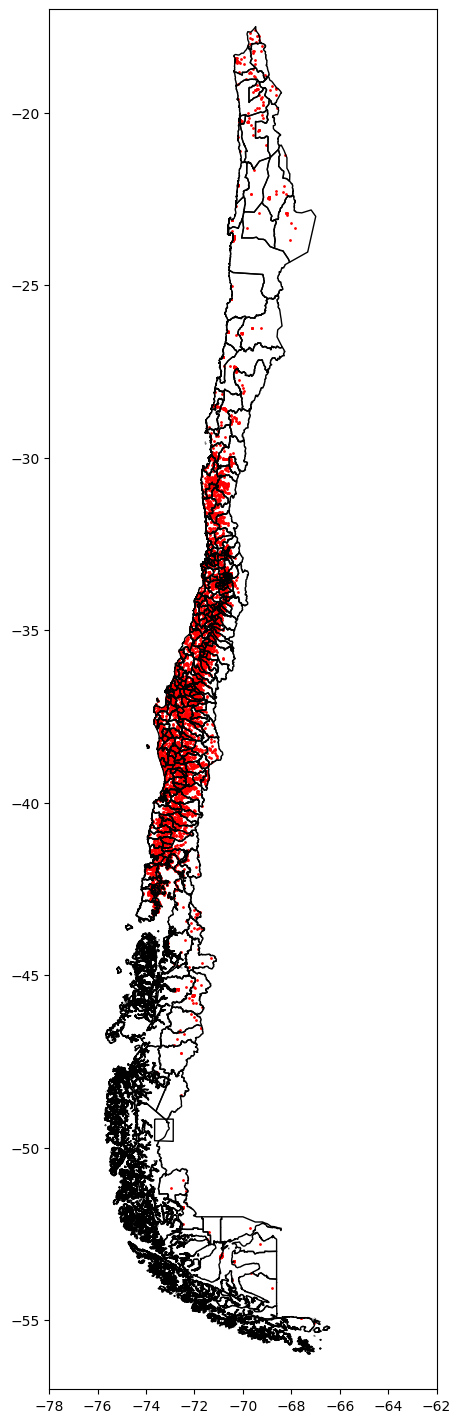

In [37]:
fig,ax=plt.subplots(1,1,figsize=(5,20))

bd5.boundary.plot(ax=ax,color='k',lw=1)
bd4.plot('.',ax=ax,color='red',markersize=1);
ax.set_ylim(-57,-17);
ax.set_xlim(-78,-62);

### 4.2 Conteste las siguientes preguntas usando las bases creadas en los puntos anteriores.

#### a. ¿Cómo son las distribuciones de notas y asistencia para los estudiantes de los establecimientos educacionales chilenos?  (5 puntos) 

<Axes: xlabel='ASISTENCIA', ylabel='Count'>

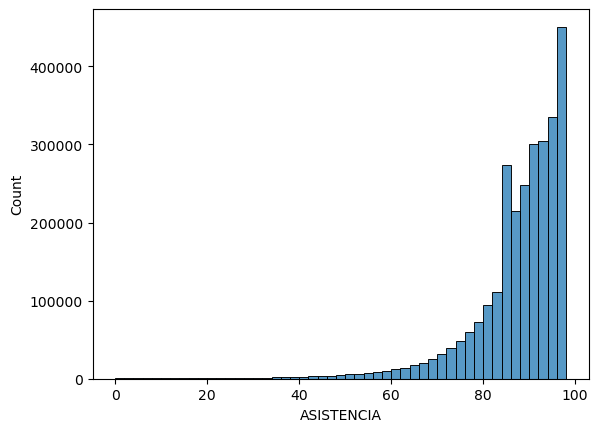

In [38]:
sns.histplot(data=bd1_clean, x='ASISTENCIA', bins=np.arange(0,100,2))

<Axes: xlabel='PROM_GRAL', ylabel='Count'>

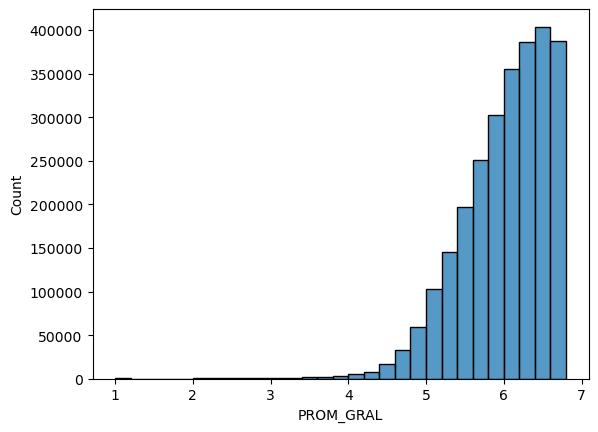

In [39]:
sns.histplot(data=bd1_clean, x='PROM_GRAL',bins=np.arange(1,7,0.2))

#### b. ¿Existe alguna diferencia entre la ASISTENCIA y PROM_GRAL de estudiante de educación media científico-humanista y técnico-profesional?  (10 puntos) 

<Axes: xlabel='ASISTENCIA', ylabel='Probability'>

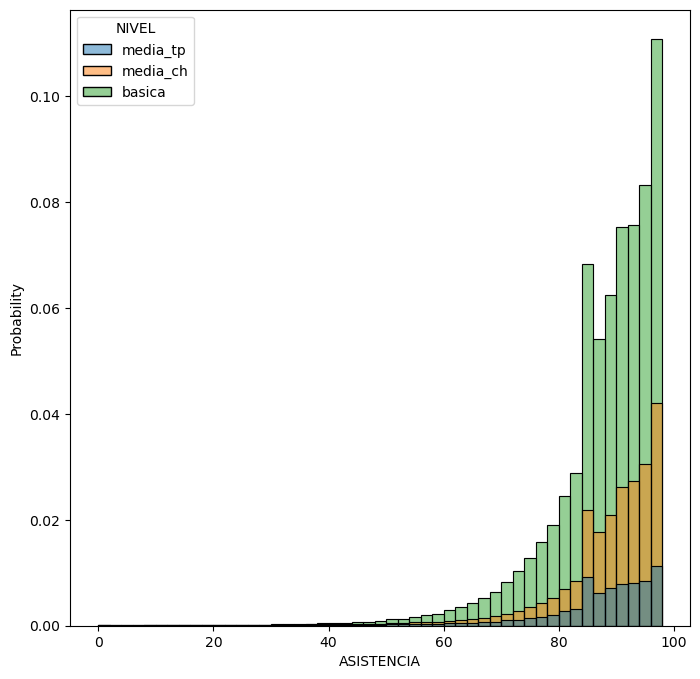

In [40]:
plt.figure(figsize=(8,8))
sns.histplot(data=bd1_clean, x='ASISTENCIA', bins=np.arange(0,100,2), hue='NIVEL', stat='probability')

<Axes: xlabel='NIVEL', ylabel='ASISTENCIA'>

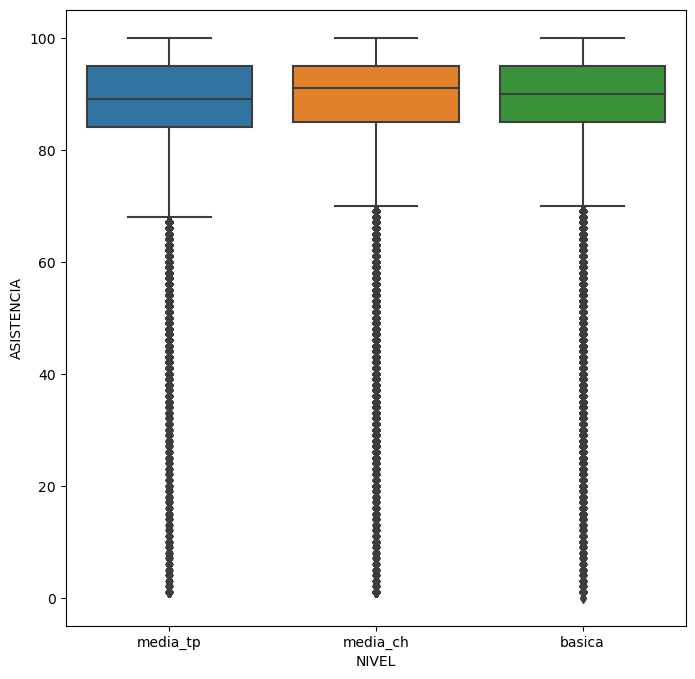

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean, y='ASISTENCIA', x='NIVEL')

<Axes: xlabel='NIVEL', ylabel='PROM_GRAL'>

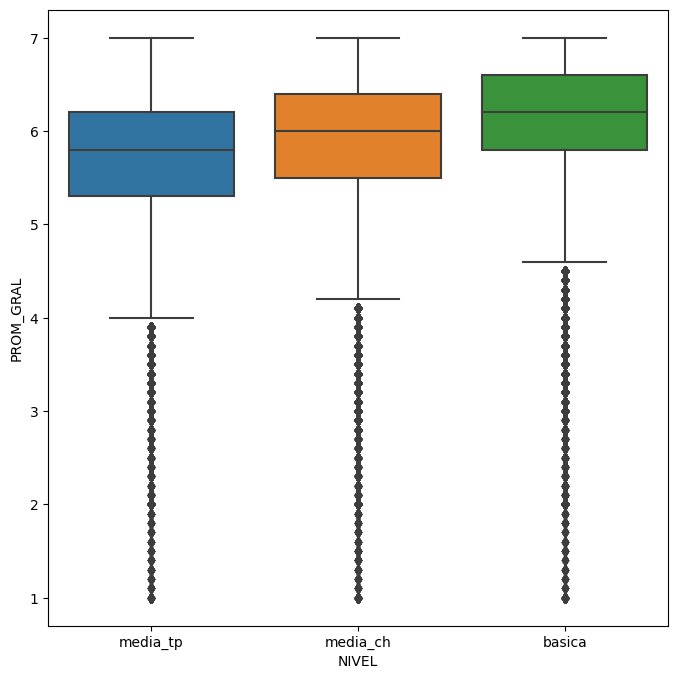

In [42]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean, y='PROM_GRAL', x='NIVEL')

#### c. ¿Cómo varía la ASISTENCIA de los estudiantes de acuerdo a su edad? ¿Hay algún patrón detectable?  (10 puntos) 

In [43]:
bd1_clean = bd1_clean[bd1_clean['EDAD_ALU']!=' ']
bd1_clean['EDAD_ALU']=bd1_clean['EDAD_ALU'].astype('float')

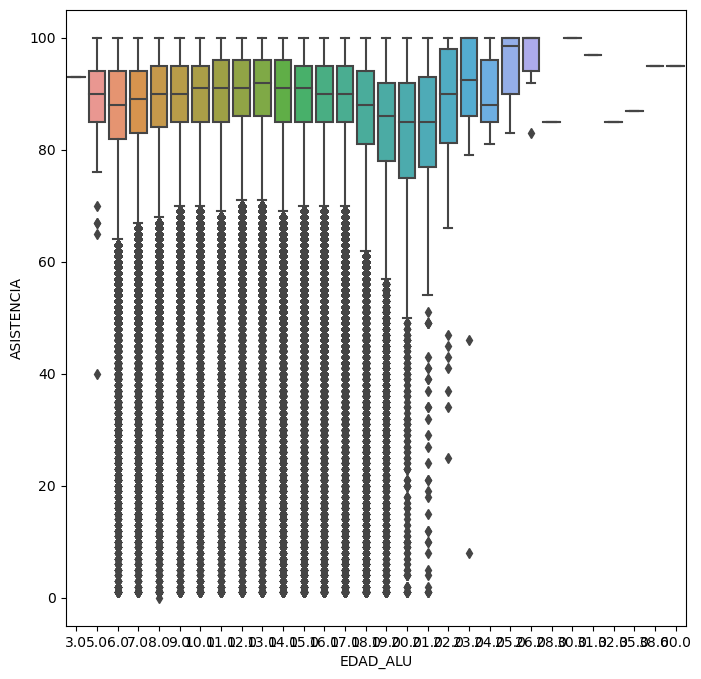

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=bd1_clean, y='ASISTENCIA', x='EDAD_ALU')

<Axes: xlabel='EDAD_ALU', ylabel='ASISTENCIA'>

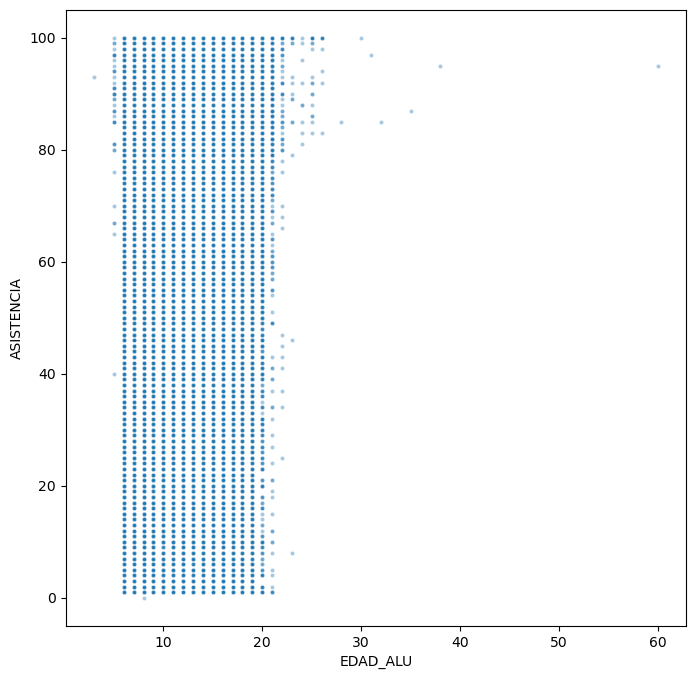

In [45]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=bd1_clean, y='ASISTENCIA', x='EDAD_ALU',marker='.', alpha=0.4)

#### d. ¿Son consistentes los datos la situación final de cada estudiante con sus datos de ASISTENCIA y PROM_GRAL? ¿Puede identificar alguna anomalía en los datos? (10 puntos)

En caso que su respuesta sea afirmativa, proponga cómo tratar dichos datos anómalos.

<Axes: xlabel='PROM_GRAL', ylabel='Count'>

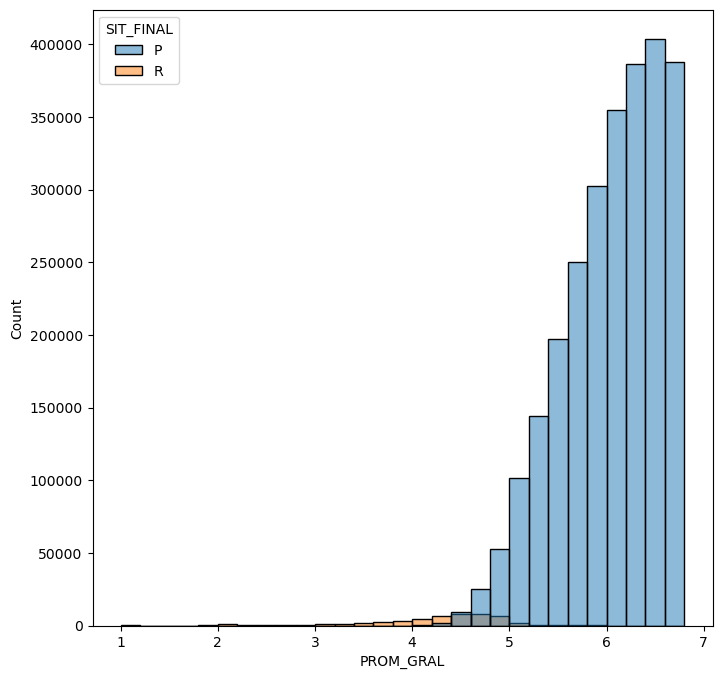

In [46]:
plt.figure(figsize=(8,8))
sns.histplot(data=bd1_clean, x='PROM_GRAL', hue='SIT_FINAL', bins=np.arange(1,7,0.2))

In [47]:
bd1_clean[(bd1_clean['SIT_FINAL']=='P') & (bd1_clean['PROM_GRAL']<4.0)]

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
14135,15,15101,media_ch,16.0,3.9,80,P
14248,15,15101,media_ch,18.0,3.7,80,P
29571,1,1101,basica,9.0,3.3,4,P
121014,3,3101,basica,15.0,3.0,17,P
157598,4,4101,media_ch,19.0,3.9,80,P
...,...,...,...,...,...,...,...
2699753,13,13401,basica,13.0,3.9,65,P
2761003,13,13110,basica,12.0,3.9,85,P
2764090,13,13404,media_ch,14.0,3.0,68,P
2914840,13,13603,basica,14.0,3.9,60,P


In [48]:
rep = bd1_clean[(bd1_clean['SIT_FINAL']=='R') & (bd1_clean['PROM_GRAL']>4.0)]
rep

,REGION,COMUNA,NIVEL,EDAD_ALU,PROM_GRAL,ASISTENCIA,SIT_FINAL
19,15,15101,media_tp,14.0,4.7,85,R
52,15,15101,media_tp,14.0,4.5,85,R
54,15,15101,media_tp,15.0,4.5,85,R
63,15,15101,media_tp,16.0,4.4,85,R
70,15,15101,media_tp,15.0,4.2,85,R
...,...,...,...,...,...,...,...
2984711,13,13201,basica,6.0,5.1,76,R
2984744,13,13201,basica,7.0,4.8,89,R
2984853,13,13201,basica,9.0,4.3,50,R
2984856,13,13201,basica,8.0,4.8,85,R


<Axes: xlabel='ASISTENCIA', ylabel='Count'>

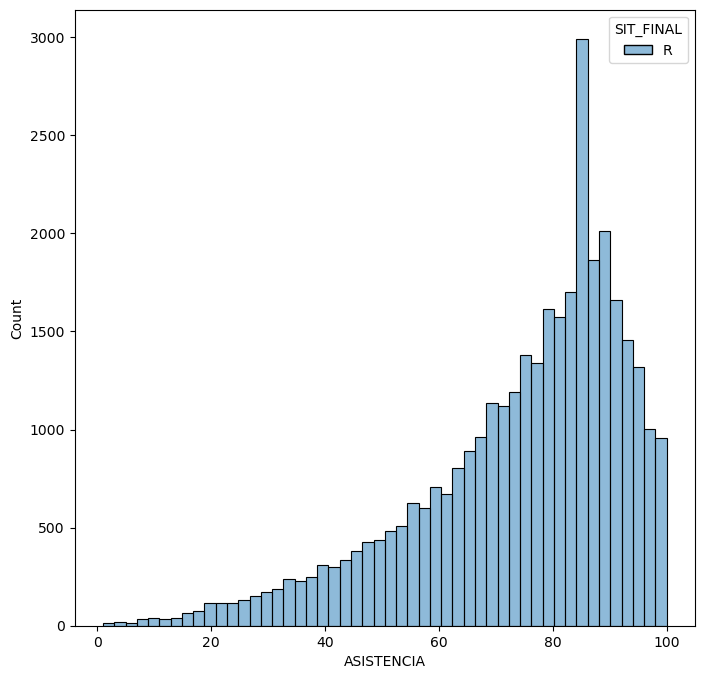

In [51]:
plt.figure(figsize=(8,8))
sns.histplot(data=rep, x='ASISTENCIA', bins=50, hue='SIT_FINAL')

#### e. ¿Cómo varía la tasa de docentes/estudiantes por región y por tipo de educación? ¿Hay algún patrón detectable? (10 puntos)

<Axes: xlabel='REGION', ylabel='RAZON_DOC_EST'>

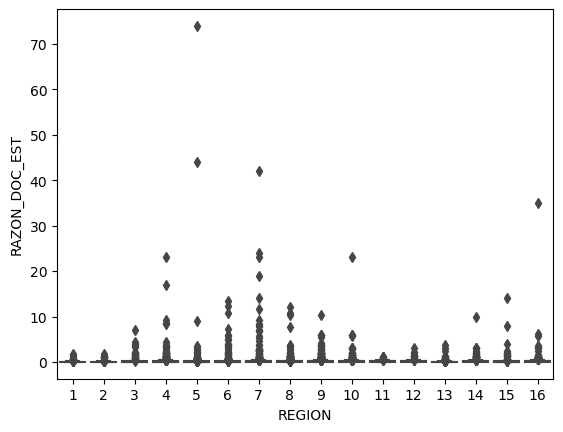

In [53]:
sns.boxplot(data=bd2_3, y='RAZON_DOC_EST', x='REGION')

<Axes: xlabel='REGION_y', ylabel='RAZON_DOC_EST'>

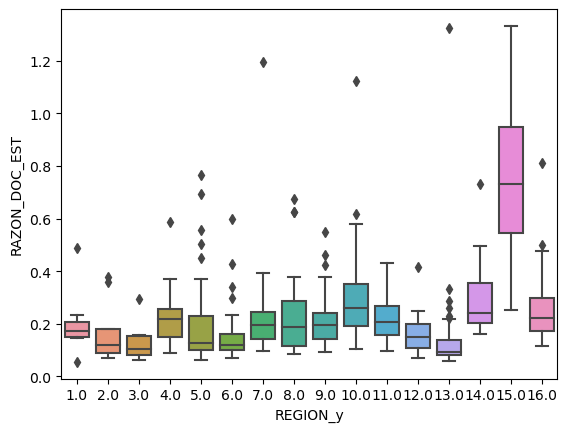

In [55]:
sns.boxplot(data=df_final, y='RAZON_DOC_EST', x='REGION_y')

#### f. ¿Puede identificar alguna correlación entre el rendimiento escolar (PROM_GRAL), la ASISTENCIA, y la RAZON_DOC_EST para los escolares chileno (no-adultos)? ¿Cree que es posible realizar este análisis, y plantear algún modelo (general o parcial) a partir de los datos utilizados? (15 puntos)

Justifique y argumente claramente su respuesta.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

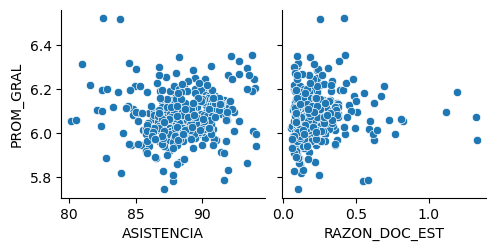

In [56]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df_final,y_vars=['PROM_GRAL'],x_vars=['ASISTENCIA','RAZON_DOC_EST'])

<Axes: >

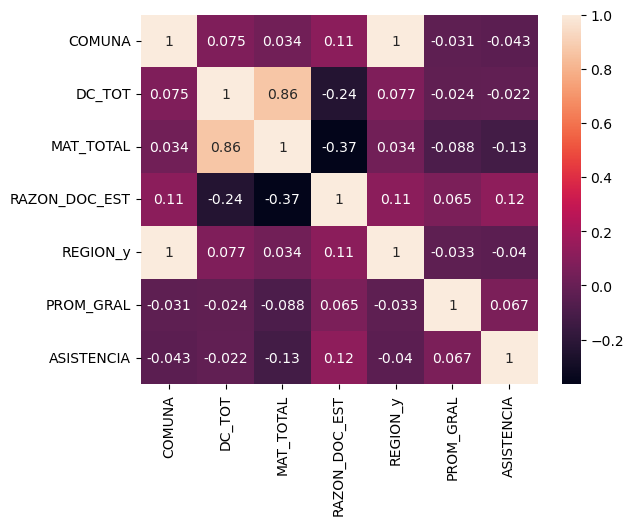

In [57]:
sns.heatmap(df_final.corr(),annot=True)

<Axes: >

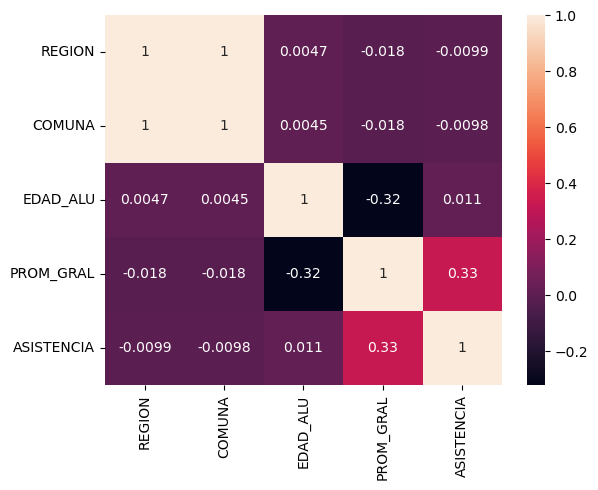

In [65]:
sns.heatmap(bd1_clean[['REGION', 'COMUNA', 'EDAD_ALU', 'PROM_GRAL', 'ASISTENCIA']].corr(), annot=True)